In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Task 2

One hour before kick off a group of 500 Sturm-Liouville Graz Ultras arrive all at once. These away fans
are to be processed as standard visitors. Can the resulting queue be dealt with in time for the kick off?

To solve this we spawn 250 Graz Ultras 25 Minutes before the game starts.

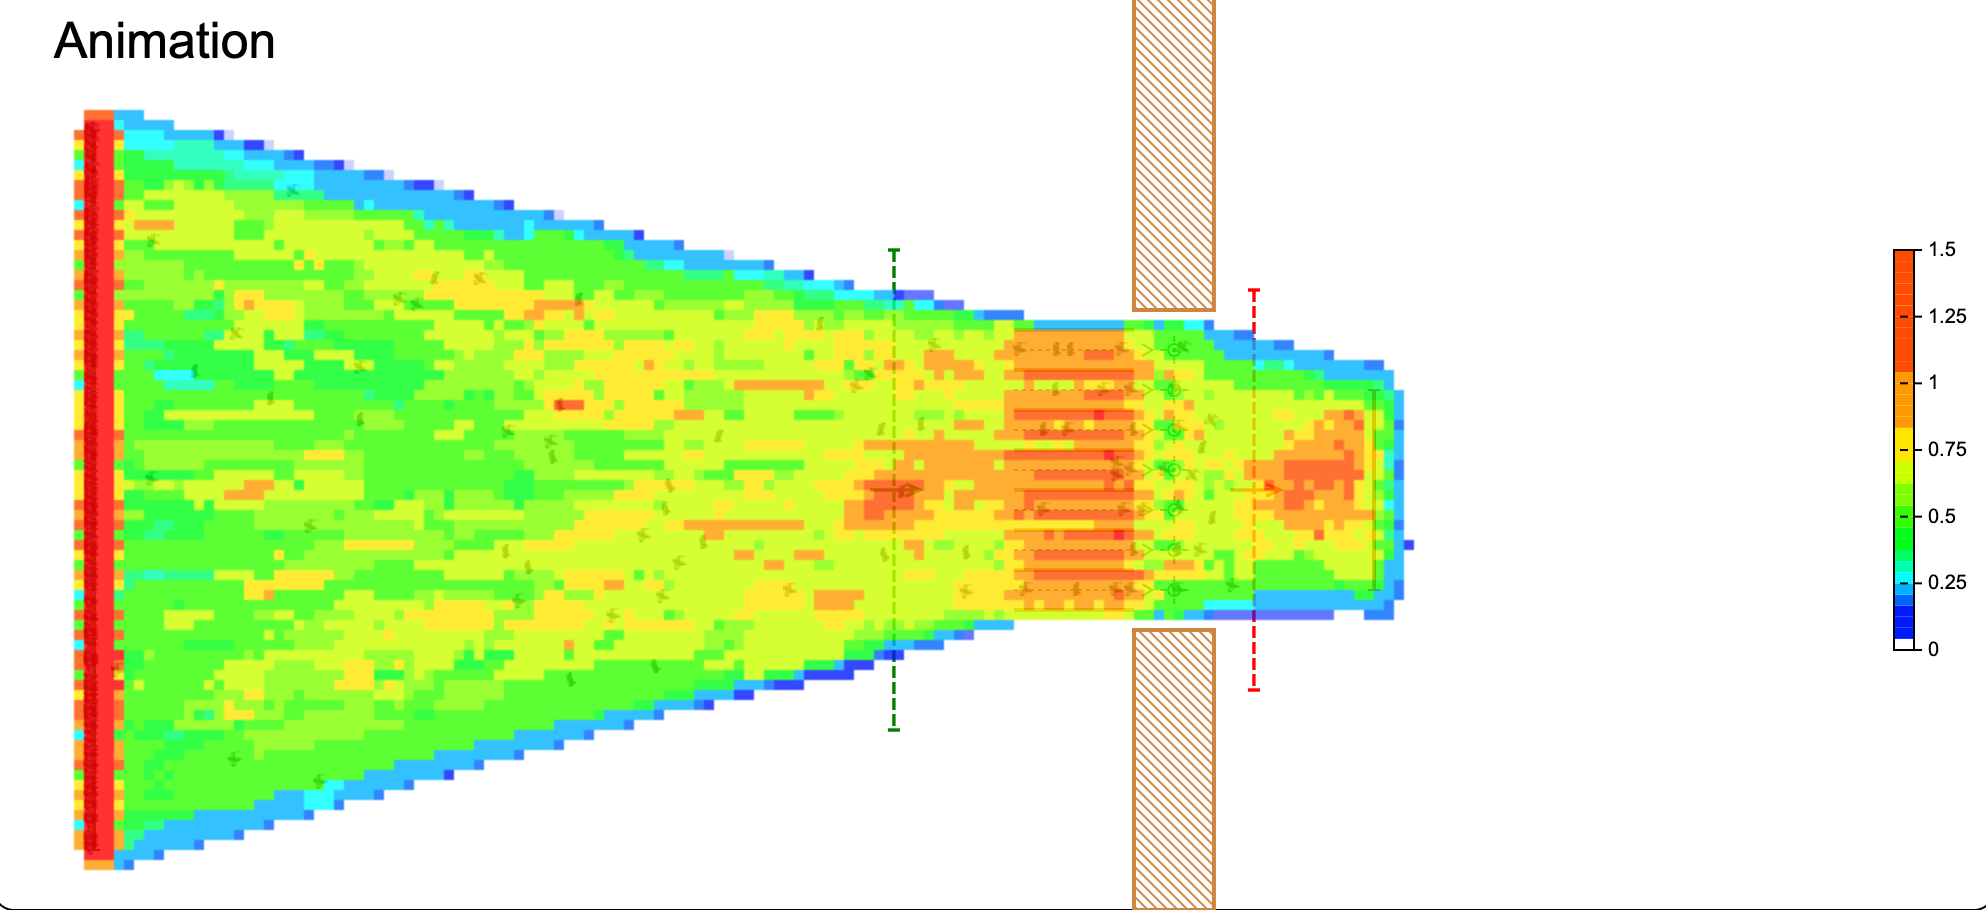

As you can see all 250 Fans spawn at the same Time.

The plot below shows the waiting numbers. We observed 5 runs and wrote the number of ultras in the queue down in a csv frame. In the beginning we see that a lot of ultras are being served in a short amount of time.

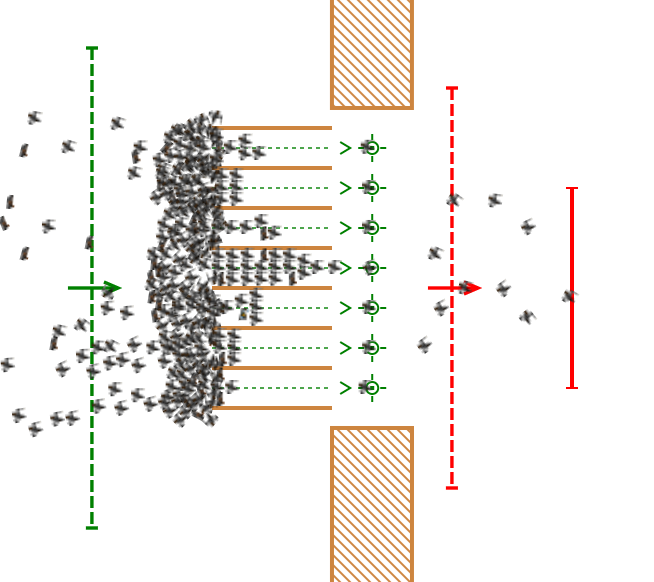

This is because at that time only around 100 normal fans are on its way to the stadium so the utras can distribute equally over all lines. A single agents allways take the queue which is the shortest and geographically close but is not switching the line while waiting.

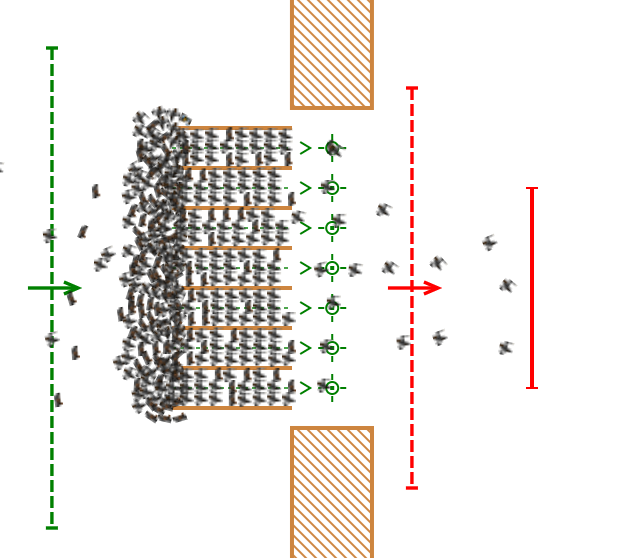

When there are only around 30 Ultras left we see a decrease in the overall serving speed. This is because the lines are now mixed with more normal fans (Over 200 Standard Fans and 150 Season ticket holders). So the queues are very dense at that point.

In our 5 runs the last 10 Ultras needed around 10 minutes to enter the stadium (from spawn to finish security check)

   Time  Ultra
0     0  250.0
1     1  247.0
2     2  201.0
3     3  159.6
4     4  111.2


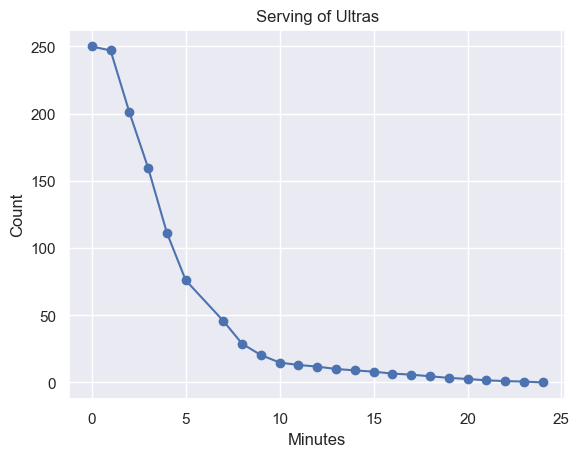

Time Interval: 1.0434782608695652
Arrival Rate: 0.9583333333333334
Last Ultra entered Stadium 2 Minutes Before Kickoff
Expected Waiting Time: 1.0434782608695652

Average Waiting Time for 5-minute Intervals:
5min_intervals
[0, 5)      193.760000
[5, 10)      42.750000
[10, 15)     11.720000
[15, 20)      5.680000
[20, 25)      1.173333
Name: Ultra, dtype: float64


In [20]:
df = pd.read_csv("task2.csv")
#df["Time"] = df["Time"] + 25
df_grouped = df.groupby('Time').agg({'Ultra':'mean'}).reset_index()
print(df_grouped.head())
# Plotting Time against Ultra
plt.plot(df_grouped['Time'], df_grouped['Ultra'],marker='o', linestyle='-')
plt.title('Serving of Ultras')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()


# Calculate Time Interval
time_interval = df_grouped['Time'].diff().mean()

# Calculate Arrival Rate
arrival_rate = 1 / time_interval

# Calculate Expected Waiting Time
expected_waiting_time = 1 / arrival_rate

# Create 5-minute intervals and calculate the average expected waiting time
df_grouped['5min_intervals'] = pd.cut(df_grouped['Time'], bins=range(0, max(df_grouped['Time']) + 6, 5), right=False)
average_waiting_times = df_grouped.groupby('5min_intervals')['Ultra'].mean()
first_time_ultra_zero = df_grouped.loc[df_grouped['Ultra'] == 0, 'Time'].idxmin()

# Display the results
print(f"Time Interval: {time_interval}")
print(f"Arrival Rate: {arrival_rate}")
print(f"Last Ultra entered Stadium {50 - 25 - first_time_ultra_zero} Minutes Before Kickoff")
print(f"Expected Waiting Time: {expected_waiting_time}")
print("\nAverage Waiting Time for 5-minute Intervals:")
print(average_waiting_times)

# Task 5

Is it true that staying in one queue is faster than switching between lines? Try to implement an impatient kind of visitor that switches queues once, after for example, a waiting time threshold is reached, in the hopes that the new queue is faster than the old one. Think of a sensible condition for switching. Compare average waiting times between patient and impatient fans.

To Implement This in our Model we switched the Queuestyle to *line* since otherwise the agent cannot cross the barriers between the lines. For the rest of the model it does not make a difference since the serving style stays the same.

We spawn an impatient Agent every 10 Minutes to capture the avarage waiting time. We did 5 runs and analysed the waiting times of standard users and standard users that switches the queues after 3 Minutes of waiting.

   run  time  total  served  people_served  people_waiting
0    0     0      0       0            0.0               0
1    0     1     40      11           11.0              29
2    0     2     71      34           23.0              37
3    0     3    132      84           50.0              48
4    0     4    161     118           34.0              43


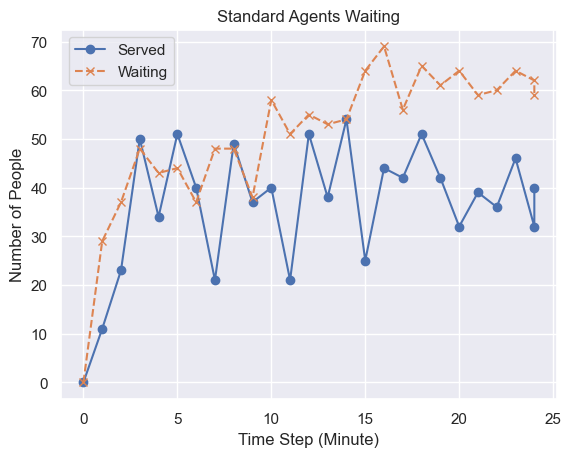

Total Waiting Time: 18729 minutes
Number of Agents Served: 949.0
Total Number of Agents: 1008
94.14682539682539% Agents got served during the first 25 Minutes
The average waiting time is 13.434141201264488 time units.


In [34]:
df = pd.read_csv("std_waiting_b_ultras.csv")


# Calculate the number of people served at each time step
df['people_served'] = df['served'].diff().fillna(df['served'])

# Calculate the number of people waiting to be served at each time step
df['people_waiting'] = df['total'] - df['served']

print(df.head())

# Plotting the number of people served and waiting at each time step
plt.plot(df['time'], df['people_served'], marker='o', linestyle='-', label='Served')
plt.plot(df['time'], df['people_waiting'], marker='x', linestyle='--', label='Waiting')
plt.title('Standard Agents Waiting')
plt.xlabel('Time Step (Minute)')
plt.ylabel('Number of People')
plt.legend()
plt.show()

# Calculate the total waiting time
total_waiting_time = (df['people_waiting'] * df['time']).sum()

# Calculate the number of agents served
num_agents_served = df['people_served'].sum()

# Calculate the expected waiting time
expected_waiting_time = total_waiting_time / num_agents_served

print(f"Total Waiting Time: {total_waiting_time} minutes")
print(f"Number of Agents Served: {num_agents_served}")
print(f"Total Number of Agents: {df['total'].max()}")
print(f"{(num_agents_served/df['total'].max()) * 100 }% Agents got served during the first 25 Minutes")



# Calculate the waiting time for each time step
df['waiting_time'] = df['time'] * df['people_served']

# Calculate the total waiting time
total_waiting_time = df['waiting_time'].sum()

# Calculate the average waiting time
average_waiting_time = total_waiting_time / df['people_served'].sum()

print(f"The average waiting time is {average_waiting_time} time units.")

   agentNr  patientWaitingSec  impatientWaitingSec  switches
0        1               71.8                 75.6       0.0
1        2              160.0                155.4       0.0
2        3              251.0               1967.0      10.6
3        4              652.8               1382.0       7.0
4        5              635.6                779.8       4.0


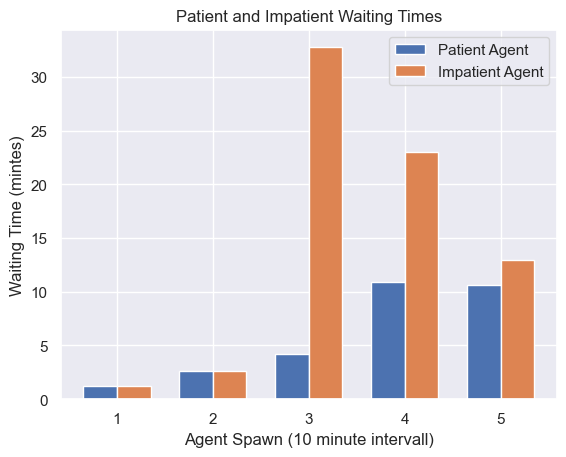

In [46]:
df = pd.read_csv('10min_average_waiting.csv')
df_grouped = df.groupby('agentNr').agg({'patientWaitingSec':'mean', 'impatientWaitingSec':'mean', 'switches':'mean'}).reset_index()
print(df_grouped.head())

# Transform seconds to minutes
df_grouped['patientWaitingMin'] = df_grouped['patientWaitingSec'] / 60
df_grouped['impatientWaitingMin'] = df_grouped['impatientWaitingSec'] / 60
# Set up positions for the bars
bar_width = 0.35
bar_positions = df_grouped['agentNr']

# Plotting the bar chart
plt.bar(bar_positions - bar_width/2, df_grouped['patientWaitingMin'], width=bar_width, label='Patient Agent')
plt.bar(bar_positions + bar_width/2, df_grouped['impatientWaitingMin'], width=bar_width, label='Impatient Agent')

# Adding labels and title
plt.xlabel('Agent Spawn (10 minute intervall)')
plt.ylabel('Waiting Time (mintes)')
plt.title('Patient and Impatient Waiting Times')
plt.xticks(bar_positions)
plt.legend()

# Show the plot
plt.show()